In [1]:
import csv

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
ydata = []
with open(r'K:\My Documents\Downloads\Washington County COVID-19 - Data.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        ydata.append(row[4])
ydata = np.array([float(val) for val in ydata[6:]])

In [3]:
xdata = np.linspace(0, len(ydata), len(ydata), endpoint=False) + 5

In [9]:
def func(x, a, b):
    return a * np.exp(-b * x)

In [11]:
popt, pcov = curve_fit(func, xdata[10:50], ydata[10:50])

K:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [34]:
func(xdata, *np.sqrt(pcov.diagonal()))

array([0.02832332, 0.02806791, 0.0278148 , 0.02756398, 0.02731542,
       0.0270691 , 0.026825  , 0.0265831 , 0.02634338, 0.02610582,
       0.02587041, 0.02563712, 0.02540593, 0.02517683, 0.02494979,
       0.02472481, 0.02450185, 0.0242809 , 0.02406194, 0.02384496,
       0.02362993, 0.02341685, 0.02320568, 0.02299642, 0.02278905,
       0.02258354, 0.02237989, 0.02217808, 0.02197808, 0.02177989,
       0.02158349, 0.02138886, 0.02119598, 0.02100484, 0.02081543,
       0.02062772, 0.02044171, 0.02025737, 0.02007469, 0.01989367,
       0.01971427, 0.0195365 , 0.01936032, 0.01918574, 0.01901273,
       0.01884128, 0.01867137, 0.018503  , 0.01833615, 0.0181708 ,
       0.01800694, 0.01784456, 0.01768364, 0.01752418, 0.01736615,
       0.01720955, 0.01705436, 0.01690057, 0.01674817, 0.01659714,
       0.01644747, 0.01629915, 0.01615217, 0.01600652, 0.01586218,
       0.01571914, 0.01557739, 0.01543691, 0.01529771, 0.01515976,
       0.01502305, 0.01488758, 0.01475333, 0.01462029, 0.01448

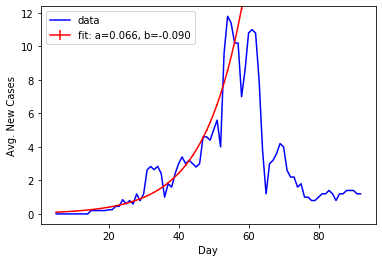

In [35]:
plt.plot(xdata, ydata, 'b-', label='data')
ylim = plt.ylim()
plt.errorbar(xdata, func(xdata, *popt), yerr=func(xdata, *np.sqrt(pcov.diagonal())), fmt='r-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.ylim(*ylim)
plt.xlabel('Day')
plt.ylabel('Avg. New Cases')
plt.legend()
plt.show()

In [17]:
popt - pcov.diagonal()

array([ 0.06552053, -0.09007086])